In [1]:
cd /pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis/

/pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis


In [2]:
import pickle
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import json
import gc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
data_path = 'Data/sepsis_removed_0.pkl'
pkl = pickle.load(open(data_path, 'rb'))
data = pkl[0]
oc = pkl[1]
train_ind = pkl[2]
valid_ind = pkl[3]
test_ind = pkl[4]
del pkl

In [4]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_inds = pos_oc['ts_ind'].to_list()

In [5]:
data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.000000,1.000000
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.000000,1.000000
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.000000,1.000000
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.000000,1.000000
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.000000,1.000000
...,...,...,...,...,...,...,...
82886223,57281,20.400000,MBP,0.195381,chart,78.552377,17.645628
82886224,57281,20.400000,O2 Saturation,-0.678068,chart,96.820961,4.160290
82886225,57281,20.400000,RR,0.179866,chart,26.278501,15.130729
82886226,57281,20.400000,SBP,-0.404061,chart,120.239648,25.341836


In [6]:
text_data = data[data.variable == 'Text']
text_data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.0,1.0
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.0,1.0
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


In [7]:
text_data.sort_values(['ts_ind', 'hour'])

,ts_ind,hour,variable,value,TABLE,mean,std
638818,0,5.683333,Text,rn progress note\nneuro; pt aox3 pt affect slo...,noteevents,1.0,1.0
453442,0,9.066667,Text,[**2198-2-15**] 8:32 AM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
453932,0,11.133333,Text,[**2198-2-15**] 10:36 AM\n CHEST (PORTABLE AP)...,noteevents,1.0,1.0
453987,0,15.666667,Text,[**2198-2-15**] 3:08 PM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
638069,0,18.933333,Text,RESP: PT. INTUBATED AFTER SEVERAL ATTEMPT AT N...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
742243,57280,16.966667,Text,TRANSFER NOTE FROM N-SICU\nD: 80 YR OLD RETIRE...,noteevents,1.0,1.0
675206,57281,1.000000,Text,Mr. [**Known lastname 829**] is a 60 yr gentle...,noteevents,1.0,1.0
17469,57281,5.400000,Text,PATIENT/TEST INFORMATION:\nIndication: Coronar...,noteevents,1.0,1.0
675207,57281,9.300000,Text,"CCU NPN 1900-0700\nS: "" Can I go home tomorrow...",noteevents,1.0,1.0


In [8]:
oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
1,1,188028,270,0
2,2,173727,271,0
3,3,164716,272,0
4,4,158689,273,0
...,...,...,...,...
57376,45558,143774,94944,0
57377,45559,123750,94950,0
57378,50487,196881,94953,0
57379,45560,118475,94954,0


In [9]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
8,7,192224,279,1
25,48221,179726,292,1
43,31,194340,305,1
68,52,172132,329,1
...,...,...,...,...
57274,45480,187410,90658,1
57311,45509,133967,91950,1
57343,45536,116543,94828,1
57347,45540,133042,94846,1


In [10]:
# pos_inds = pos_oc['ts_ind'].to_list()
# pos_inds

## ALL

In [11]:
# text_data_24 = text_data[text_data.hour <= 24].reset_index()
# text_data_24

## POS

In [12]:
# text_data_24_pos = text_data_24[text_data_24['ts_ind'].isin(pos_inds)]
# text_data_24_pos

## NEG

In [13]:
# text_data_24_neg = text_data_24[~text_data_24['ts_ind'].isin(pos_inds)]
# text_data_24_neg

# Visualization

### ALL

In [34]:
obs_windows = range(20, 124, 4)

pos = []

neg = []

for x in tqdm(obs_windows):
    data = text_data[text_data.hour <= x].reset_index()
    pos_data = data[data['ts_ind'].isin(pos_inds)]
    neg_data = data[~data['ts_ind'].isin(pos_inds)]
    
    pos.append(len(pos_data))
    neg.append(len(neg_data))

100%|██████████| 26/26 [00:03<00:00,  7.23it/s]


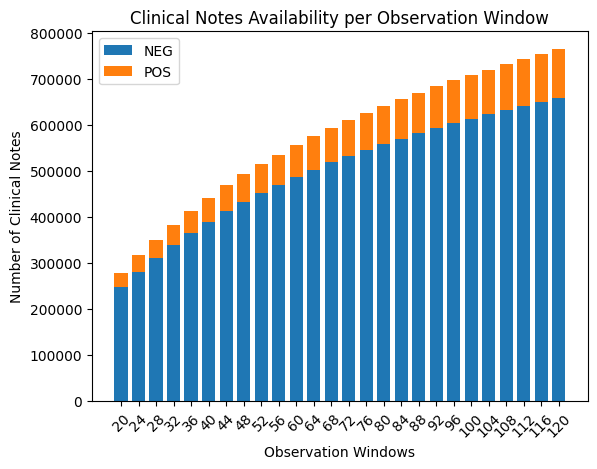

In [35]:
labels = ['POS', 'NEG']

bar_width = 3.0

# Create the stacked bar chart
plt.bar(obs_windows, neg, width=bar_width, label = 'NEG')
plt.bar(obs_windows, pos, bottom= neg, width=bar_width, label = 'POS')

# Add labels and title
plt.xlabel('Observation Windows')
plt.ylabel('Number of Clinical Notes')
plt.title('Clinical Notes Availability per Observation Window')
plt.legend()  # Add a legend to indicate which color represents which group

plt.xticks(rotation=45)
plt.xticks(obs_windows)

plt.savefig('notes_bars.png')

# Show the plot
plt.show()

### AVG

In [17]:
obs_windows = range(20, 124, 4)

pos = []

neg = []

for x in tqdm(obs_windows):
    data = text_data[text_data.hour <= x].reset_index()
    pos_data = data[data['ts_ind'].isin(pos_inds)]
    neg_data = data[~data['ts_ind'].isin(pos_inds)]
    
    pos.append(len(pos_data)/pos_data['ts_ind'].nunique())
    neg.append(len(neg_data)/neg_data['ts_ind'].nunique())

100%|██████████| 26/26 [00:03<00:00,  6.99it/s]


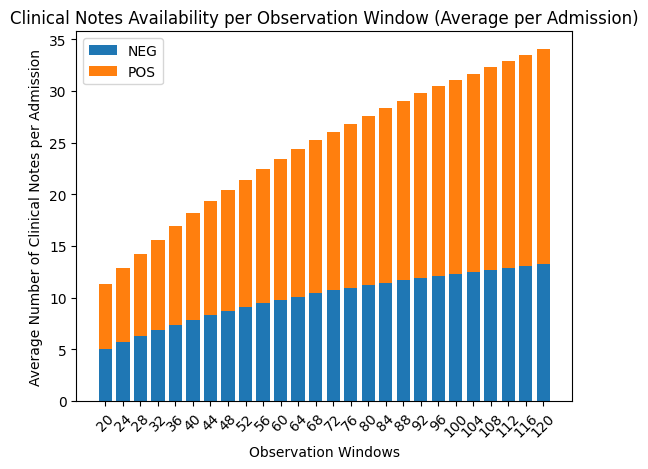

In [25]:
labels = ['POS', 'NEG']

bar_width = 3

# Create the stacked bar chart
plt.bar(obs_windows, neg, width=bar_width, label = 'NEG')
plt.bar(obs_windows, pos, bottom= neg, width=bar_width, label = 'POS')

# Add labels and title
plt.xlabel('Observation Windows')
plt.ylabel('Average Number of Clinical Notes per Admission')
plt.title('Clinical Notes Availability per Observation Window (Average per Admission)')
plt.legend()  # Add a legend to indicate which color represents which group

plt.xticks(obs_windows)
plt.xticks(rotation=45)

plt.savefig('avg_notes.png')

# Show the plot
plt.show()